In [1]:
import pandas as pd
import numpy as np
import scipy as scipy

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# rc = {'lines.linewidth': 2,
#       'axes.labelsize': 18,
#       'axes.titlesize': 18,
#       'axes.facecolor': 'DFDFE5'}
# sns.set_context('notebook', rc=rc)
sns.set_style("darkgrid")

ALFA = 1

In [2]:
names_cols = ['id',
 'gender',
 'age',
 'age_higher_than_60',
 'rt_pcr_result',
 'crp_admission',
 'inr_admission',
 'pt_admission',
 'fibrinogen_admission',
 'chest_ct_admission',
 'platalet_count_admission',
 'chest_ct_1_week',
 'crp_1_week',
 'platalet_count_1_week']

index_cols = list(range(5)) + list(range(8,17))

icu = pd.read_csv("dataset/Baranovskiietal.2020DatasetofCOVID-19Patients.xlsx - ICU-transferred patients.csv",
                     usecols=index_cols, names=names_cols, index_col=0, header=0, decimal=",")
icu["icu"] = 1

icu.head(3)

,gender,age,age_higher_than_60,rt_pcr_result,crp_admission,inr_admission,pt_admission,fibrinogen_admission,chest_ct_admission,platalet_count_admission,chest_ct_1_week,crp_1_week,platalet_count_1_week,icu
id,,,,,,,,,,,,,,
ICU01,1,37,0,1,133.0,NaN,NaN,NaN,40.0,141,80.0,131.0,376.0,1
ICU02,0,48,0,1,155.0,NaN,NaN,NaN,72.0,238,NaN,135.0,NaN,1
ICU03,0,40,0,1,191.0,1.26,13.7,5.1,50.0,160,92.0,NaN,NaN,1


In [4]:
stable = pd.read_csv("dataset/Baranovskiietal.2020DatasetofCOVID-19Patients.xlsx - Stable patients.csv",
                     names=names_cols, index_col=0, header=0, decimal=",")
stable["icu"] = 0
stable.head()

,id,gender,age,age_higher_than_60,rt_pcr_result,crp_admission,inr_admission,pt_admission,fibrinogen_admission,chest_ct_admission,platalet_count_admission,chest_ct_1_week,crp_1_week,platalet_count_1_week,icu
STP01,1,70,1,1,7.0,112.0,1.10,12.0,5.46,161,40.0,7.0,28.0,407.0,0
STP02,1,46,0,1,10.0,72.0,1.39,15.1,5.00,306,35.0,12.0,28.0,431.0,0
STP03,1,94,1,1,3.0,84.0,1.08,11.8,2.98,199,75.0,20.0,25.0,251.0,0
STP04,1,74,1,1,11.0,69.0,NaN,NaN,NaN,97,40.0,90.0,44.0,316.0,0
STP05,1,53,0,1,8.0,135.0,1.43,15.5,6.87,302,40.0,135.0,NaN,308.0,0


In [5]:
icu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, ICU01 to ICU100
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    100 non-null    int64  
 1   age                       100 non-null    int64  
 2   age_higher_than_60        100 non-null    int64  
 3   rt_pcr_result             100 non-null    int64  
 4   crp_admission             97 non-null     float64
 5   inr_admission             86 non-null     float64
 6   pt_admission              86 non-null     float64
 7   fibrinogen_admission      68 non-null     float64
 8   chest_ct_admission        88 non-null     float64
 9   platalet_count_admission  100 non-null    int64  
 10  chest_ct_1_week           53 non-null     float64
 11  crp_1_week                54 non-null     float64
 12  platalet_count_1_week     52 non-null     float64
 13  icu                       100 non-null    int64  
dtypes: float

In [6]:

def non_parametric_bootstrap(array, sample_size=20, nsim=1000, central_measure=np.nanmean):
    array = array[~np.isnan(array)]
    statistic = []
    for i in range(nsim):
        statistic.append(central_measure(np.random.choice(array, sample_size, True)))
    return np.array(statistic)

In [7]:
def get_ci(data):
    message = "Mean = {0:.3g} | CI = [{1:.3g}, {2:.3g}]"
    percentis = np.percentile(data, [0+ALFA/2, 100-ALFA/2])
    mean = np.median(data)
    message = message.format(mean, *percentis)
    return message

Estável Proteína C-Reativa (mg/L): Mean = 77.3 | CI = [49.3, 107]
UTI Proteína C-Reativa (mg/L): Mean = 122 | CI = [95.5, 160]
Estável Protrombina (segundos): Mean = 13.6 | CI = [12.9, 14.3]
UTI Protrombina (segundos): Mean = 14.4 | CI = [13.6, 15.4]
Estável Fibrinogênio (mg/L): Mean = 4.99 | CI = [4.46, 5.63]
UTI Fibrinogênio (mg/L): Mean = 4.86 | CI = [4.24, 5.58]
Estável Contagem de plaquetas (10^9/L): Mean = 46.1 | CI = [39.7, 52.8]
UTI Contagem de plaquetas (10^9/L): Mean = 182 | CI = [147, 224]


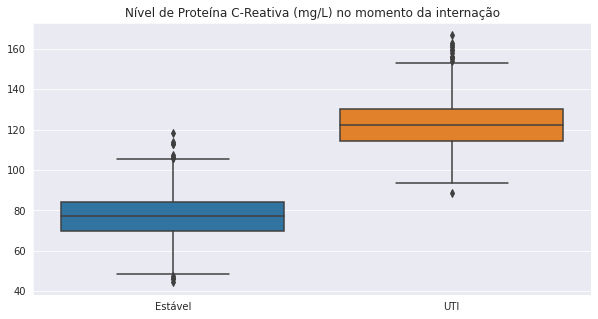

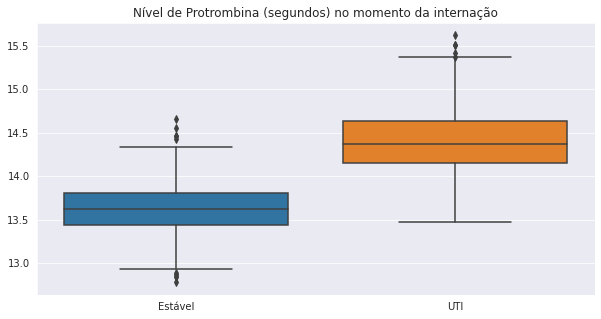

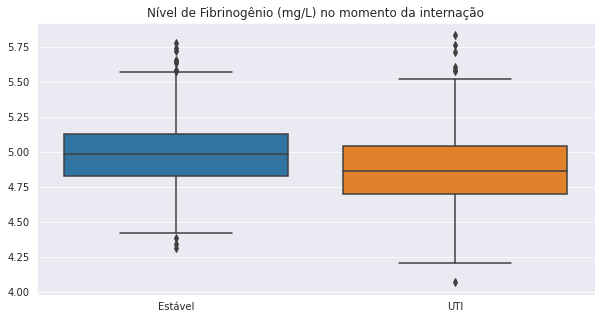

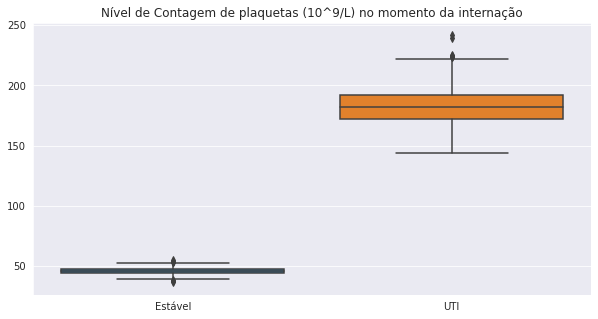

In [21]:
info = "Mean = {0:.3g}; CI95% = [{1:.3g}, {2:.3g}]"
columns = ["crp_admission", "pt_admission", "fibrinogen_admission", "platalet_count_admission"]
names = ["Proteína C-Reativa (mg/L)", "Protrombina (segundos)",  "Fibrinogênio (mg/L)", "Contagem de plaquetas (10^9/L)"]
for column, name in zip(columns, names):
    mean_stable = non_parametric_bootstrap(stable[column] , sample_size=30)
    mean_icu = non_parametric_bootstrap(icu[column], sample_size=30)
    means = pd.DataFrame({"Estável": mean_stable, "UTI": mean_icu})

    plt.figure(figsize=(10, 5))
    sns.boxplot(data=means)
    message = "Mean = {0:.3g}; CI = [{1:.3g}, {2:.3g}]"
    print(f"Estável {name}: {get_ci(mean_stable)}")
    print(f"UTI {name}: {get_ci(mean_icu)}")
    plt.title(f"Nível de {name} no momento da internação")
    plt.savefig(f"imagens/boxplot/{column}.jpg")

In [ ]:
# # icu_percentis = np.percentile(mean_crp_icu, [2.5, 97.5])
# # icu_mean = np.median(mean_crp_icu)
# # icu_info = info.format(icu_mean, *icu_percentis)
# #
# # stable_percentis = np.percentile(mean_crp_stable, [2.5, 97.5])
# # stable_mean = np.median(mean_crp_stable)
# # stable_info = info.format(stable_mean, *stable_percentis)
#
# plt.title(f"Bootstrapped mean values of CRP Levels one week after admission on hospital")
# #plt.xlabel([stable_info, icu_info])
# plt.ylabel("Mean CRP level of samples")

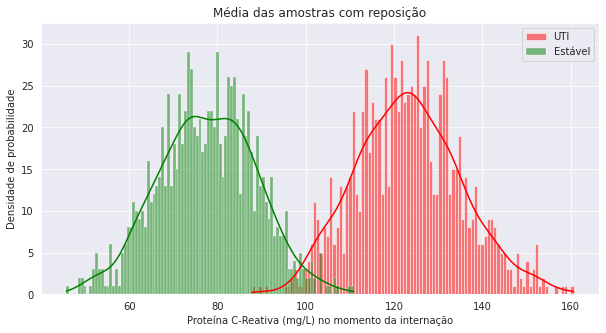

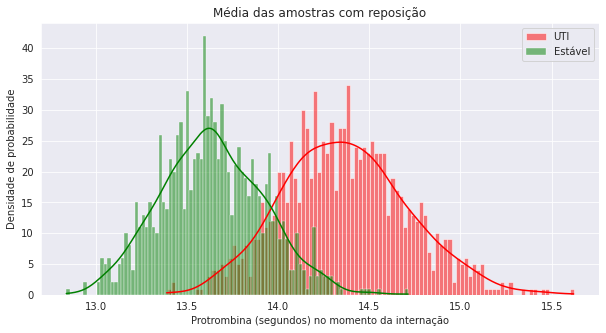

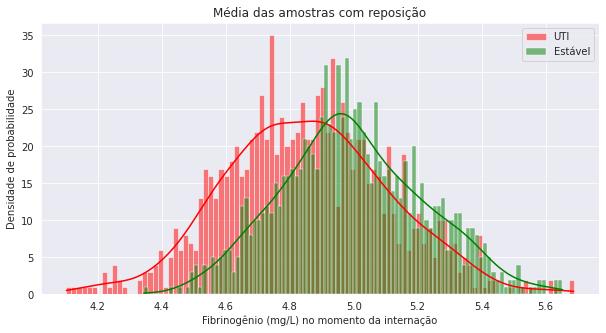

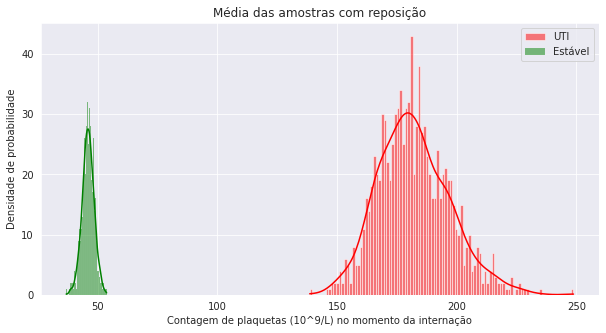

In [22]:
for column, name in zip(columns, names):
    mean_stable = non_parametric_bootstrap(stable[column], sample_size=30)
    mean_icu = non_parametric_bootstrap(icu[column], sample_size=30)
    plt.figure(figsize=(10, 5))
    sns.histplot(mean_icu, label='UTI', color="r", bins=100, kde=True)
    sns.histplot(mean_stable, label='Estável', color="g", bins=100, kde=True)
    plt.ylabel('Densidade de probabilidade')
    plt.xlabel(name + " no momento da internação")
    plt.title("Média das amostras com reposição")
    plt.legend()
    plt.savefig(f"imagens/densidade/{column}.jpg")

# Hypothesis Test:
 - Null hypothesis: CRP mean level of stable patients == CRP mean level of ICU patients

 - Alternative hypothesis: CRP mean level of stable patients != CRP mean level of ICU patients

Alpha: 1%

In [43]:
for column, name in zip(columns, names):
    print(f"""- Hipótese nula: Nivel de {name} em pacientes estáveis == Nível de {name} em pacientes na UTI
- Hipótese alternativa: Nivel de {name} em pacientes estáveis <> Nível de {name} em pacientes na UTI
    """)
    mean_stable = non_parametric_bootstrap(stable[column], nsim=10000)
    mean_icu = non_parametric_bootstrap(icu[column], nsim=10000)
    stat, pvalue = scipy.stats.mannwhitneyu(mean_stable, mean_icu)

    if pvalue < ALFA / 100:
        print('Rejeita a hipótese nula com p-valor de {0:.2g}'.format(pvalue))
    else:
        print('Falha em rejeitar a hipótese nula com p-valor de  of {0:.2g}'.format(pvalue))
    print("*"*20)

- Hipótese nula: Nivel de Proteína C-Reativa em pacientes estáveis == Nível de Proteína C-Reativa em pacientes na UTI
- Hipótese alternativa: Nivel de Proteína C-Reativa em pacientes estáveis <> Nível de Proteína C-Reativa em pacientes na UTI
    
Rejeita a hipótese nula com p-valor de 0
********************
- Hipótese nula: Nivel de Protrombina em pacientes estáveis == Nível de Protrombina em pacientes na UTI
- Hipótese alternativa: Nivel de Protrombina em pacientes estáveis <> Nível de Protrombina em pacientes na UTI
    
Rejeita a hipótese nula com p-valor de 0
********************
- Hipótese nula: Nivel de Fibrinogênio em pacientes estáveis == Nível de Fibrinogênio em pacientes na UTI
- Hipótese alternativa: Nivel de Fibrinogênio em pacientes estáveis <> Nível de Fibrinogênio em pacientes na UTI
    
Rejeita a hipótese nula com p-valor de 3.7e-222
********************
- Hipótese nula: Nivel de Contagem de plaquetas em pacientes estáveis == Nível de Contagem de plaquetas em paciente

The p-value for these samples is 0
We can reject the null hypothesis that the means are equal between both samples


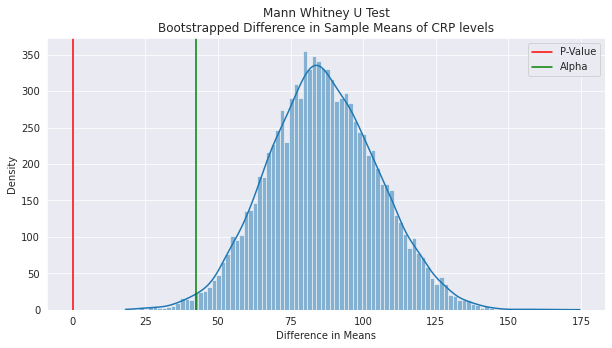

In [130]:
# diff = mean_crp_icu - mean_crp_stable
# pvalue = (diff < 0).mean()
# plt.figure(figsize=(10, 5))
# sns.histplot(diff, bins=100, kde=True)
# plt.axvline(stat, color='red',label='P-Value')
# plt.axvline(np.percentile(diff, ALFA), color='green',label='Alpha')
# plt.title("Mann Whitney U Test\nBootstrapped Difference in Sample Means of CRP levels")
# plt.xlabel("Difference in Means")
# plt.ylabel("Density")
# plt.legend()
#
# print('The p-value for these samples is {:.3g}'.format(pvalue))
# if pvalue < ALFA/100:
#     print('We can reject the null hypothesis that the means are equal between both samples')
# else:
#     print('We cannot reject the null hypothesis that the means are equal between both samples')

# References
 - [Bootstrap non parametric test](https://vulstats.ucsd.edu/pdf/Howell.ch-18.rank-statistics.pdf)


